In [3]:

import replicate
from PIL import Image
from urllib.request import urlretrieve


In [2]:

for event in replicate.stream(
    "meta/meta-llama-3-70b-instruct",
    input={
        "prompt": "what is a power on stall in aviation?",
    },
): print(str(event), end="")




In aviation, a power-on stall (also known as a "torque stall" or "engine stall") is a specific type of stall that occurs when an aircraft's engine is producing power, typically during takeoff or climb.

A stall occurs when the wing's angle of attack exceeds its critical angle, resulting in a loss of lift and a sudden decrease in airspeed. In a power-on stall, the engine is still producing power, but the wing is unable to produce enough lift to counteract the weight of the aircraft.

There are a few reasons why a power-on stall might occur:

1. **High pitch or angle of attack**: If the pilot pulls the nose of the aircraft up too quickly or too steeply, the wing can stall even with the engine producing power.
2. **Insufficient airspeed**: If the aircraft is not moving fast enough, the wing may not be able to produce enough lift, leading to a stall.
3. **Excessive weight or cargo**: If the aircraft is overloaded or has too much cargo, it may not be able to climb or maintain airspeed, le

In [4]:

output = replicate.run(
  "black-forest-labs/flux-schnell",
  input={"prompt": "a car driven by an elephant in a spooky forest"}
)


In [5]:

res = output[0].url


In [6]:

urlretrieve(res, "car_out1.png")


('car_out1.png', <email.message.Message at 0x10dc139d0>)

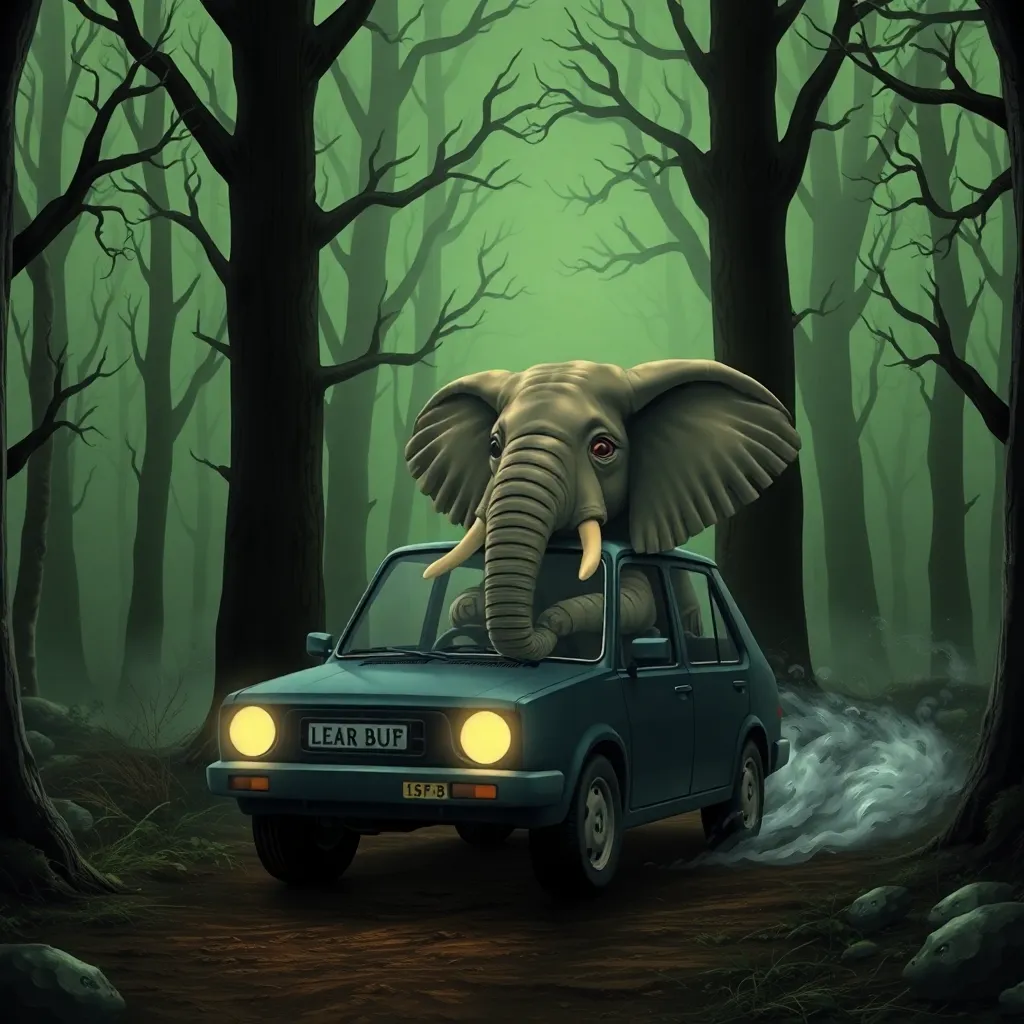

In [7]:

background = Image.open("car_out1.png")
background


In [8]:

for event in replicate.stream(
    "meta/meta-llama-3-70b-instruct",
    input={
        "prompt": "what causes proteinuria in dogs?",
    },
): print(str(event), end="")




Proteinuria in dogs is a condition where there is an excessive amount of protein in the urine. There are several possible causes of proteinuria in dogs, including:

1. **Kidney disease**: The kidneys filter waste products from the blood, and normally, they retain proteins in the bloodstream. However, if the kidneys are damaged or diseased, they may allow proteins to leak into the urine. Chronic kidney disease, glomerulonephritis, and nephrotic syndrome are examples of kidney diseases that can cause proteinuria.
2. **Inflammation or infection**: Inflammation or infection of the kidneys, urinary tract, or bladder can cause proteinuria. Examples include pyelonephritis (kidney infection), cystitis (bladder infection), and prostatitis (prostate infection).
3. **Amyloidosis**: This is a condition where abnormal proteins called amyloids accumulate in the kidneys, leading to proteinuria.
4. **Systemic lupus erythematosus**: This is an autoimmune disease that can cause proteinuria due to infl


## Gen Images from my own fine-tuned AI model


In [35]:


output = replicate.run(
    "rcalix1/rcalix-flux3:a2ace1f6f4f04e931244e0386292996adc03cd1246e4ada292a82a07f3cef80c",
    input={"prompt": "TOC as a viking  with shield in japan" }
)

output


In [36]:

res = output[0].url


In [37]:

urlretrieve(res, "jurassic_out4.png")


('jurassic_out4.png', <http.client.HTTPMessage at 0x10f636af0>)

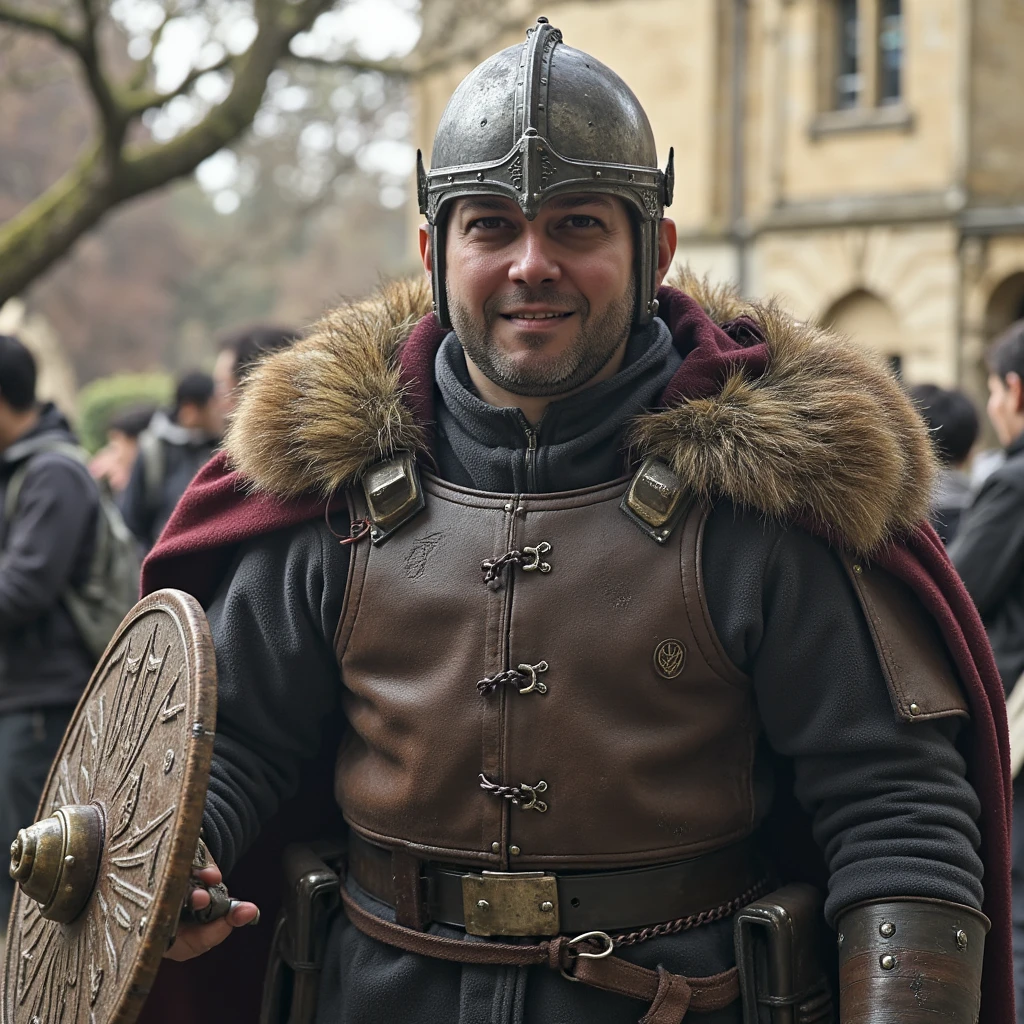

In [38]:

background = Image.open("jurassic_out4.png")
background


In [27]:

from urllib.request import urlretrieve

model = replicate.models.get("stability-ai/stable-video-diffusion")
version = model.versions.get("3f0457e4619daac51203dedb472816fd4af51f3149fa7a9e0b5ffcf1b8172438")

prediction = replicate.predictions.create(
    version=version,
    input={
      "cond_aug": 0.02,
      "decoding_t": 7,
      "input_image": "https://replicate.delivery/pbxt/JvLi9smWKKDfQpylBYosqQRfPKZPntuAziesp0VuPjidq61n/rocket.png",
      "video_length": "14_frames_with_svd",
      "sizing_strategy": "maintain_aspect_ratio",
      "motion_bucket_id": 127,
      "frames_per_second": 6
    })

prediction.wait()

urlretrieve(prediction.output, "/tmp/out.mp4")


('/tmp/out.mp4', <http.client.HTTPMessage at 0x10f4cf610>)

In [28]:

from IPython.display import Video

Video(prediction.output)
